# Points Per Game Differential Bar Chart

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Load file
teams_data_loading = Path("Teams By Season.csv")
champions_data_loading = Path("Revised NBA Champions.csv")


# Read file
teams_data = pd.read_csv(teams_data_loading)
champions_data = pd.read_csv(champions_data_loading)

# Show file

teams_data


,Unnamed: 0,Team,Wins,Losses,Win %,Points Per Game,Opp. Points Per Game,Season Year
0,0,Miami Heat,52,30,0.634,94.4,91.3,1999-2000
1,1,New York Knicks,50,32,0.610,92.1,90.7,1999-2000
2,2,Philadelphia 76ers,49,33,0.598,94.8,93.4,1999-2000
3,3,Orlando Magic,41,41,0.500,100.1,99.4,1999-2000
4,4,Boston Celtics,35,47,0.427,99.3,100.1,1999-2000
...,...,...,...,...,...,...,...,...
590,590,Houston Rockets,53,29,0.646,113.9,109.1,2018-2019
591,591,San Antonio Spurs,48,34,0.585,111.7,110.0,2018-2019
592,592,Memphis Grizzlies,33,49,0.402,103.5,106.1,2018-2019
593,593,New Orleans Pelicans,33,49,0.402,115.4,116.8,2018-2019


In [88]:
# Drop the unnamed column and the league column.

teams_data = teams_data.drop(columns= ['Unnamed: 0'])

# Add champion data to team dataset.
teams_with_champs = pd.merge(
    teams_data, champions_data,
    left_on='Season Year', right_on='Year',
    left_index=False, right_index=False)

teams_with_champs = teams_with_champs.rename(
    columns={"Abbreviation": "Champs(abv.)"})

teams_with_champs = teams_with_champs.drop(columns='Year') 
teams_with_champs

,Team,Wins,Losses,Win %,Points Per Game,Opp. Points Per Game,Season Year,Champion,Champs(abv.)
0,Miami Heat,52,30,0.634,94.4,91.3,1999-2000,Los Angeles Lakers,LAL
1,New York Knicks,50,32,0.610,92.1,90.7,1999-2000,Los Angeles Lakers,LAL
2,Philadelphia 76ers,49,33,0.598,94.8,93.4,1999-2000,Los Angeles Lakers,LAL
3,Orlando Magic,41,41,0.500,100.1,99.4,1999-2000,Los Angeles Lakers,LAL
4,Boston Celtics,35,47,0.427,99.3,100.1,1999-2000,Los Angeles Lakers,LAL
...,...,...,...,...,...,...,...,...,...
590,Houston Rockets,53,29,0.646,113.9,109.1,2018-2019,Toronto Raptors,TOR
591,San Antonio Spurs,48,34,0.585,111.7,110.0,2018-2019,Toronto Raptors,TOR
592,Memphis Grizzlies,33,49,0.402,103.5,106.1,2018-2019,Toronto Raptors,TOR
593,New Orleans Pelicans,33,49,0.402,115.4,116.8,2018-2019,Toronto Raptors,TOR


In [89]:
# Create a new column that equals the point differential.

teams_with_champs['Point Diff.'] = teams_with_champs['Points Per Game'] - teams_with_champs['Opp. Points Per Game']

teams_with_champs

,Team,Wins,Losses,Win %,Points Per Game,Opp. Points Per Game,Season Year,Champion,Champs(abv.),Point Diff.
0,Miami Heat,52,30,0.634,94.4,91.3,1999-2000,Los Angeles Lakers,LAL,3.1
1,New York Knicks,50,32,0.610,92.1,90.7,1999-2000,Los Angeles Lakers,LAL,1.4
2,Philadelphia 76ers,49,33,0.598,94.8,93.4,1999-2000,Los Angeles Lakers,LAL,1.4
3,Orlando Magic,41,41,0.500,100.1,99.4,1999-2000,Los Angeles Lakers,LAL,0.7
4,Boston Celtics,35,47,0.427,99.3,100.1,1999-2000,Los Angeles Lakers,LAL,-0.8
...,...,...,...,...,...,...,...,...,...,...
590,Houston Rockets,53,29,0.646,113.9,109.1,2018-2019,Toronto Raptors,TOR,4.8
591,San Antonio Spurs,48,34,0.585,111.7,110.0,2018-2019,Toronto Raptors,TOR,1.7
592,Memphis Grizzlies,33,49,0.402,103.5,106.1,2018-2019,Toronto Raptors,TOR,-2.6
593,New Orleans Pelicans,33,49,0.402,115.4,116.8,2018-2019,Toronto Raptors,TOR,-1.4


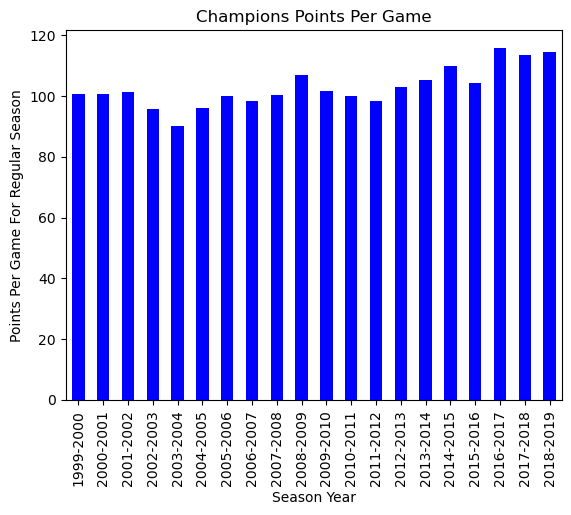

In [90]:
# Find the championship team points per game.
champ_finder = teams_with_champs.loc[
        teams_with_champs['Team']==teams_with_champs['Champion']]

champ_finder = champ_finder.set_index('Season Year')

champ_finder['Points Per Game'].plot(
        kind= 'bar',
        title= 'Champions Points Per Game',
        ylabel= 'Points Per Game For Regular Season',
        color= 'blue')

# Plot and save chart.
plt.show
plt.savefig("Saved Images/Champs Points Per Game.png", bbox_inches='tight')


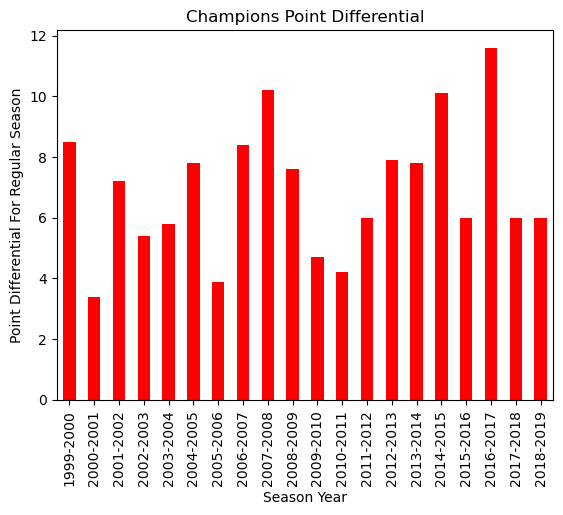

In [91]:
# Find the championship team point differential.
champ_finder['Point Diff.'].plot(
        kind= 'bar',
        title= 'Champions Point Differential',
        ylabel= 'Point Differential For Regular Season',
        color='red')

# Plot and save chart.
plt.show
plt.savefig("Saved Images/Champs Point Differential.png", bbox_inches='tight')

In [96]:
#Show dataset of championship points per game and point differential.
champ_stats = pd.DataFrame(
    {"Points Per Game": champ_finder['Points Per Game'],
    "Point Diff.": champ_finder['Point Diff.']}
)

champ_stats

,Points Per Game,Point Diff.
Season Year,,
1999-2000,100.8,8.5
2000-2001,100.6,3.4
2001-2002,101.3,7.2
2002-2003,95.8,5.4
2003-2004,90.1,5.8
2004-2005,96.2,7.8
2005-2006,99.9,3.9
2006-2007,98.5,8.4
2007-2008,100.5,10.2


In [97]:
# Find the rest of the league's points per game average and point differential average. 
contender_finder = teams_with_champs.loc[
        teams_with_champs['Team']!=teams_with_champs['Champion']]
        
contender_ppg = (contender_finder.groupby('Season Year')['Points Per Game'].mean()).round(2)
contender_pdiff = (contender_finder.groupby('Season Year')['Point Diff.'].mean()).round(2)

contender_average = pd.merge(contender_ppg,contender_pdiff, how='left', on='Season Year')

contender_average

,Points Per Game,Point Diff.
Season Year,,
1999-2000,97.36,-0.29
2000-2001,94.60,-0.13
2001-2002,95.26,-0.25
2002-2003,95.06,-0.18
2003-2004,93.51,-0.21
2004-2005,97.22,-0.28
2005-2006,96.91,-0.13
2006-2007,98.75,-0.28
2007-2008,99.90,-0.35


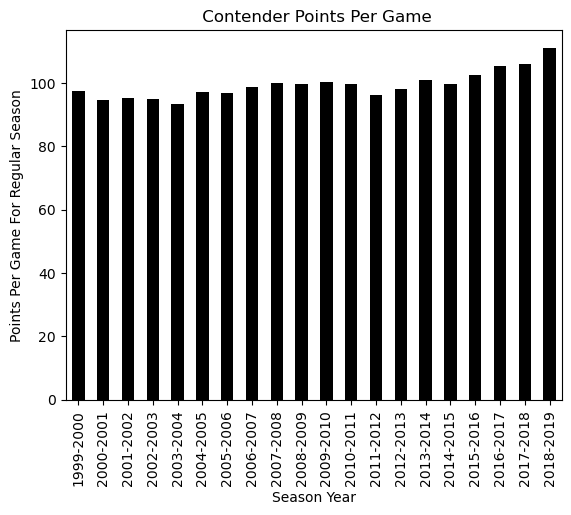

In [93]:
# Plot and save the rest of the league's points per game average.
contender_average['Points Per Game'].plot(
        kind= 'bar',
        title= ' Contender Points Per Game',
        ylabel= 'Points Per Game For Regular Season',
        color= 'black')

plt.show
plt.savefig("Saved Images/Contender Points Per Game.png", bbox_inches='tight')

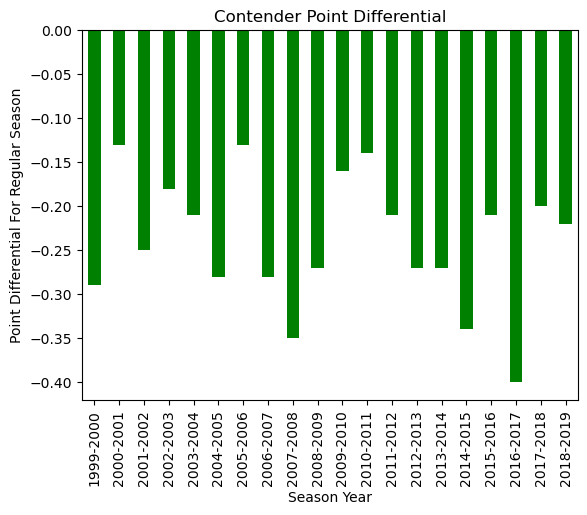

In [94]:
# Plot and save the rest of the league's point differential average.
contender_average['Point Diff.'].plot(
        kind= 'bar',
        title= 'Contender Point Differential',
        ylabel= 'Point Differential For Regular Season',
        color='green')

plt.show
plt.savefig("Saved Images/Contender Point Differential.png", bbox_inches='tight')